In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# import zipfile


# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("TMDB 5000 Movie Dataset.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

# Importing Dataset

In [92]:
# akses google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# baca dataset

df1=pd.read_csv("/content/drive/My Drive/Course/Data Science/Project/Project 5 - TMBD 5000 Movie Recommendation System/tmdb_5000_credits.csv")
df2=pd.read_csv("/content/drive/My Drive/Course/Data Science/Project/Project 5 - TMBD 5000 Movie Recommendation System/tmdb_5000_movies.csv")

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [96]:
# gabung dataset 1 dan dataset 2 dengan fungsi merge untuk menghubungkan kunci primer

df1.columns = ['id','tittle','cast','crew']
df2 = df2.merge(df1,on='id')

In [97]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Demographic Filtering

kita ingin menghitung skor dari movie dengan menggunakan sistem IMDB, sehingga kita perlu beberapa fitur berikut:
1. tot_avg_scr: rata-rata dari kolom "vote_average"
2. min_vc: minimal vote untuk dimasukkan ke dalam list film
3. avg_scr: nilai vote rata-rata dari masing-masing movie
4. vc: banyaknya vote dari masing-masin movie

In [98]:
# hitung total rata-rata dari kolom "vote_average"

tot_avg_scr = df2["vote_average"].mean()
tot_avg_scr

6.092171559442016

In [99]:
# hitung nilai vote terkecil untuk dimasukkan ke dalam top movies

min_vc = df2['vote_count'].quantile(0.9)
min_vc

1838.4000000000015

In [100]:
# buat variabel baru yang mencakup movies yang memiliki nilai vote di atas minimum vote

score_movies = df2.copy().loc[df2['vote_count'] >= min_vc]
score_movies.shape

(481, 23)

In [101]:
def weighted_rating(x, m=min_vc, C=tot_avg_scr):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [102]:
score_movies["score"] = score_movies.apply(weighted_rating, axis=1)

In [103]:
score_movies = score_movies.sort_values("score", ascending=False)
score_movies[["title", "vote_count", "vote_average", "score"]].head(10).reset_index(drop=True)

,title,vote_count,vote_average,score
0,The Shawshank Redemption,8205,8.5,8.059258
1,Fight Club,9413,8.3,7.939256
2,The Dark Knight,12002,8.2,7.920020
3,Pulp Fiction,8428,8.3,7.904645
4,Inception,13752,8.1,7.863239
5,The Godfather,5893,8.4,7.851236
6,Interstellar,10867,8.1,7.809479
7,Forrest Gump,7927,8.2,7.803188
8,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
9,The Empire Strikes Back,5879,8.2,7.697884


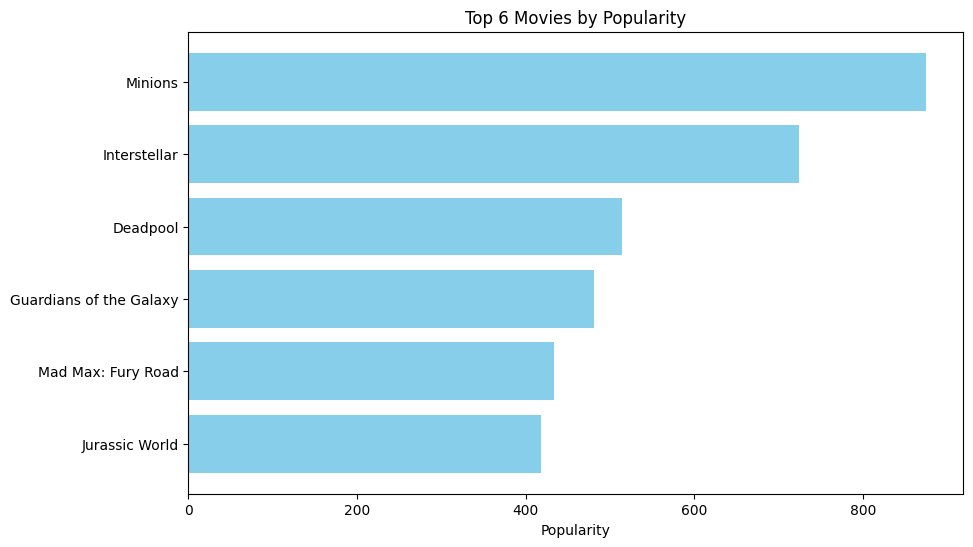

In [104]:
N = 6 # Number of movies
pop_movies = df2.nlargest(N, "popularity").sort_values('popularity', ascending=True)
# Membuat plot bar menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.barh(pop_movies['title'], pop_movies['popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.title(f'Top {N} Movies by Popularity')
plt.show()

# Content Based Filtering

## Overview Based Recommender

In [105]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [106]:
# import TFidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# buat objek tfidf vektorizer dengan memfilter stopword dalam bahasa inggris
tfidf = TfidfVectorizer(stop_words='english')

# ubah nilai NaN menjadi string tanpa karakter
df2['overview'] = df2['overview'].fillna('')

# buat variabel yang mengandung vektor dari kalimat dalam kolom "overview", fit it and transform
tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

In [107]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# hitung cosinus similarity untuk melihat keterkaitan antara satu film dengan film lainnya
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cos_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [108]:
# buat series dari setiap movies beserta indeks
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [109]:
def get_recommendation(title, cos=cos_sim):
  index = indices[title]

  similarity = list(enumerate(cos_sim[index]))

  # Urutkan film berdasarkan skor kemiripan dari yang tertinggi ke terendah
  similarity = sorted(similarity, key=lambda x: x[1], reverse=True)

  # Ambil indeks film yang memiliki skor kemiripan lebih dari 0 (tidak termasuk film itu sendiri)
  movie_recommendation = [i for i in similarity if i[1] > 0 and i[0] != index]

  # Cetak rekomendasi film
  top_list = 10
  print(f"Top {top_list} movie recommendation:\n")
  for i in range(top_list):
      print(indices.index[movie_recommendation[i][0]])


In [110]:
get_recommendation("Pirates of the Caribbean: At World's End")

Top 10 movie recommendation:

What's Love Got to Do with It
My Blueberry Nights
The Descendants
Disturbia
90 Minutes in Heaven
Just Like Heaven
Space Pirate Captain Harlock
Original Sin
Bathory: Countess of Blood
Bang Bang Baby


## Credits, Genres and Keywords Based Recommender

In [111]:
df_tmp = df2.copy()

In [112]:
# import literal_eval
from ast import literal_eval

# ubah string berbentuk objek dalam feature ke objek sungguhan
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df_tmp[feature] = df_tmp[feature].apply(literal_eval)

In [113]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [114]:
df_tmp['director'] = df_tmp['crew'].apply(get_director)

In [115]:
df_tmp['director'].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [116]:
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
    if len(names) > 3:
      return names[:len(names)]
    return names
  return []

In [117]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    df_tmp[feature] = df_tmp[feature].apply(get_list)

In [118]:
# Print the new features of the first 3 films
df_tmp[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]"


In [119]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [120]:
# gunakan fungsi "clean_data" ke fitur
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df_tmp[feature] = df_tmp[feature].apply(clean_data)

In [121]:
# buat fungsi untuk menyatukan kata dari setiap kolom [keyword, cast, director, genres]
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

# buat kolom baru bernama "soup"
df_tmp['soup'] = df_tmp.apply(create_soup, axis=1)

In [122]:
df_tmp['soup']

0       cultureclash future spacewar spacecolony socie...
1       ocean drugabuse exoticisland eastindiatradingc...
2       spy basedonnovel secretagent sequel mi6 britis...
3       dccomics crimefighter terrorist secretidentity...
4       basedonnovel mars medallion spacetravel prince...
                              ...                        
4798    unitedstates–mexicobarrier legs arms paperknif...
4799     edwardburns kerrybishé marshadietlein caitlin...
4800    date loveatfirstsight narration investigation ...
4801     danielhenney elizacoupe billpaxton alanruck z...
4802    obsession camcorder crush dreamgirl drewbarrym...
Name: soup, Length: 4803, dtype: object

In [123]:
# Import CountVectorizer dan buat matriks count
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_tmp['soup'])

In [124]:
# hitung cosine similarity berdasarkan matriks count
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [125]:
# reset indeks dari DataFrame dan melakukan mapping
df_tmp = df_tmp.reset_index()
indices = pd.Series(df_tmp.index, index=df_tmp['title'])

In [126]:
get_recommendation('The Dark Knight Rises', cosine_sim2)

Top 10 movie recommendation:

The Dark Knight
Batman Forever
Batman Returns
Batman
Batman: The Dark Knight Returns, Part 2
Batman Begins
Slow Burn
Batman v Superman: Dawn of Justice
JFK
Batman & Robin
